# EJERCICIO

## DEFINICIÓN DEL PROBLEMA

**Vamos a trabajar con un dataframe sobre los datos de propinas que viene en la librería seaborn para intentar predecir que propina dejará una persona a partir de ciertos datos como sexo, importe...**

**Como criterio de evaluación vamos a usar RCME.**

## RECOPILACIÓN Y PREPARACIÓN DE LOS DATOS

### OBTENER LOS DATOS

In [1]:
import seaborn as sns
df_tips = sns.load_dataset('tips')

Significado de las columnas:
1. `total_bill`: Esta columna representa el monto total de la factura de una transacción en el restaurante, incluyendo la comida y las bebidas.

2. `tip`: En esta columna se registra la cantidad de propina que se dio en esa transacción.

3. `sex`: Indica el sexo del camarero o camarera que atendió la mesa (por ejemplo, "Male" para masculino y "Female" para femenino).

4. `smoker`: Esta columna indica si los comensales eran fumadores o no fumadores en la mesa (por ejemplo, "Yes" para fumadores y "No" para no fumadores).

5. `day`: Registra el día de la semana en el que se realizó la transacción (por ejemplo, "Thur" para jueves, "Fri" para viernes, "Sat" para sábado y "Sun" para domingo).

6. `time`: Indica si la transacción fue durante el almuerzo o la cena (por ejemplo, "Lunch" para almuerzo y "Dinner" para cena).

7. `size`: Representa el número de comensales en la mesa.

### EXPLORAR LOS DATOS

In [2]:
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
df_tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


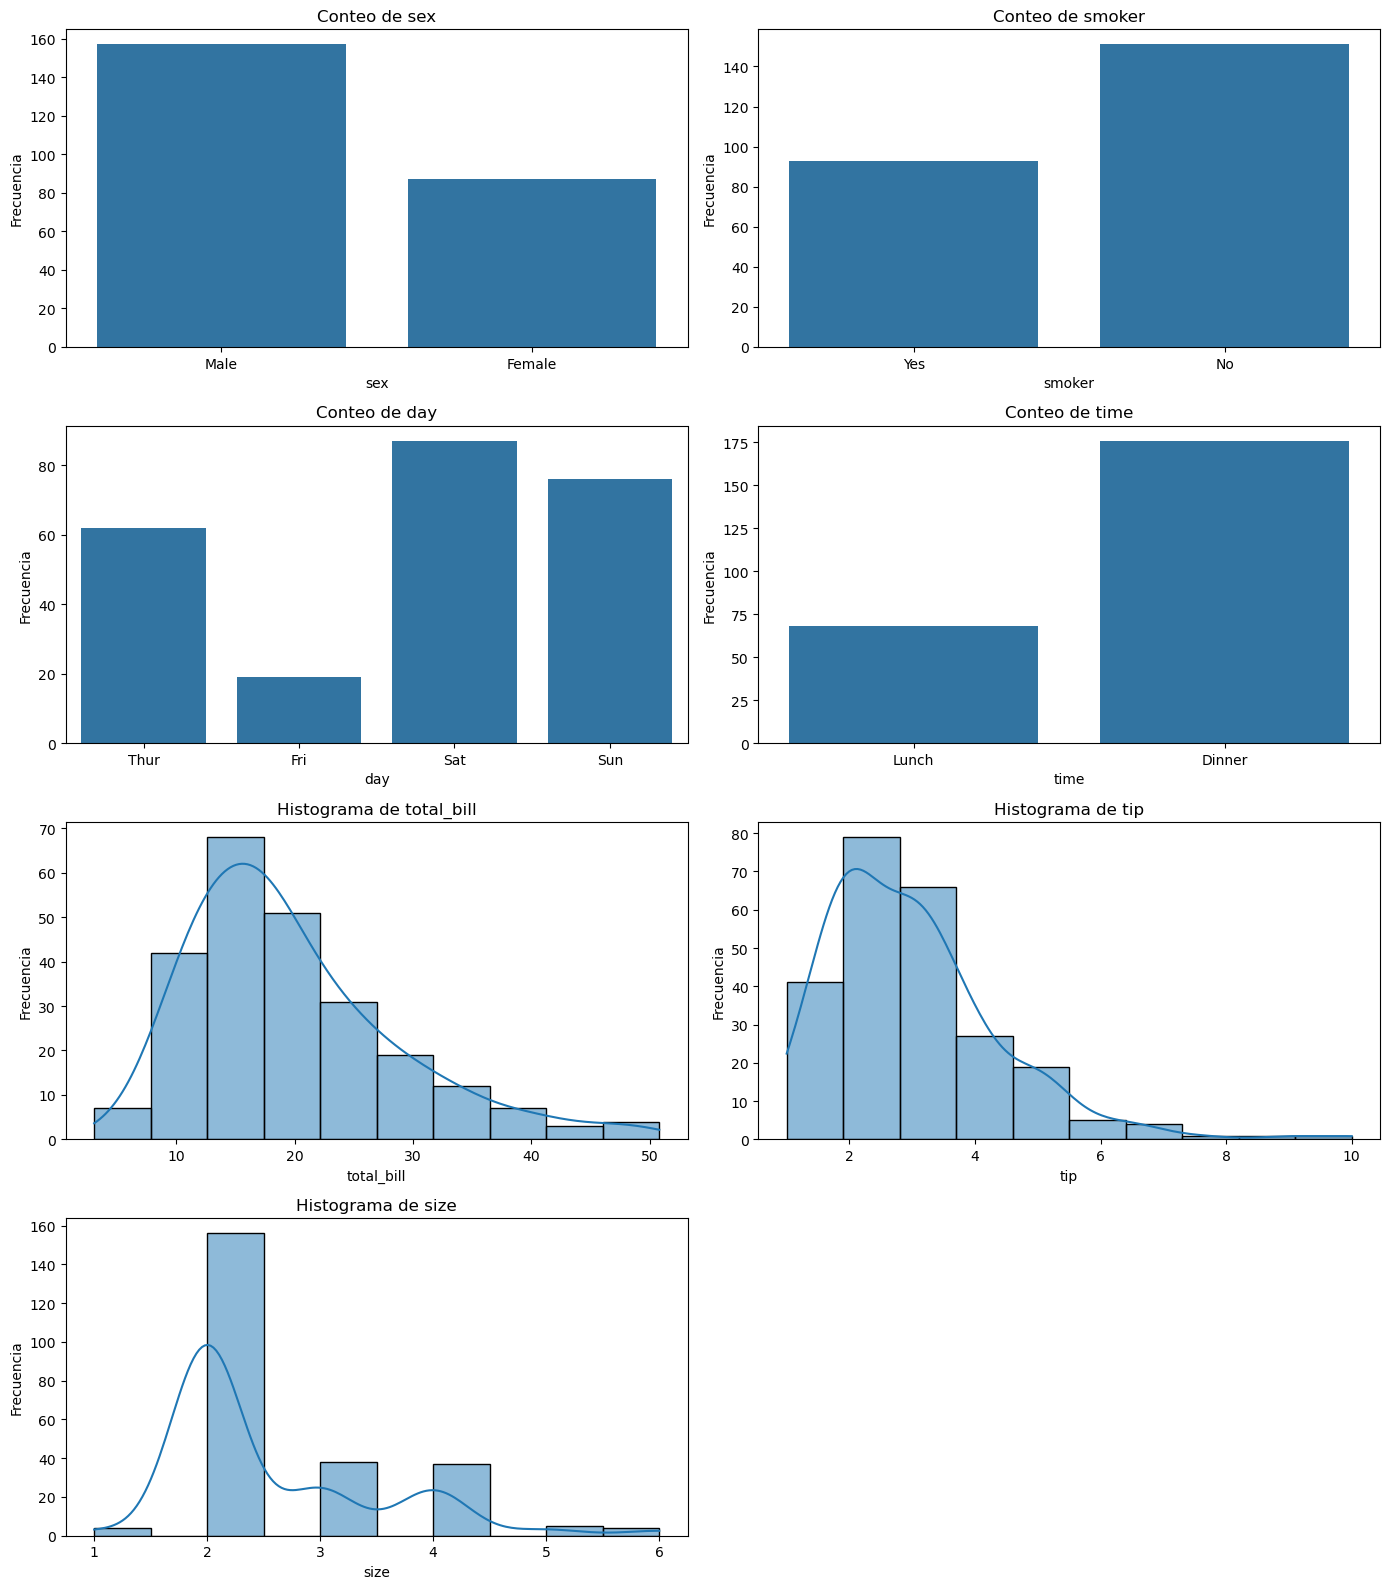

In [4]:
import matplotlib.pyplot as plt

# Seleccionar las columnas categóricas y numéricas
df_cat = df_tips.select_dtypes(include=['object', 'bool', 'category'])  # Columnas categóricas
df_num = df_tips.select_dtypes(include=['int64', 'float64'])  # Columnas numéricas

fig, axes = plt.subplots(4, 2, figsize=(14, 16))  # Tamaño de la figura ajustado
axes = axes.flatten()  # Aplanar el arreglo de ejes para un acceso más fácil

# Índice para los subplots
idx = 0

# Graficar las variables categóricas
for columna in df_cat.columns:
    if idx < len(axes):  # Verificar si el índice está dentro del rango de subplots
        sns.countplot(data=df_tips, x=columna, ax=axes[idx])
        axes[idx].set_title(f'Conteo de {columna}')
        axes[idx].set_xlabel(columna)
        axes[idx].set_ylabel('Frecuencia')
        idx += 1

# Graficar las variables numéricas
for columna in df_num.columns:
    if idx < len(axes):  # Verificar si el índice está dentro del rango de subplots
        sns.histplot(data=df_tips, x=columna, bins=10, kde=True, ax=axes[idx])
        axes[idx].set_title(f'Histograma de {columna}')
        axes[idx].set_xlabel(columna)
        axes[idx].set_ylabel('Frecuencia')
        idx += 1

# Eliminar cualquier subplot no utilizado
for j in range(idx, len(axes)):
    fig.delaxes(axes[j])

# Ajustar el diseño para evitar solapamientos
plt.tight_layout()
plt.show()

In [5]:
df_tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


* Hay que transformar la columna size a una categorica
* Parece haber un ratio de sexo hombre-mujer de 1:2
* Igual con los fumadores de si-no 1:2
* Los días más registrados son sábados y domingos
* Se han registrado más cenas que comidas
* La media de gasto por mesa es de 19.78$
* La media de la propina dada es de un 3$
* La mayoría de mesas registradas son de 2 personas, puede que sean parejas y por lo registrado suele pagar el hombre

In [8]:
df_tips[df_tips['size'] == 2].head(n = 10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
3,23.68,3.31,Male,No,Sun,Dinner,2
6,8.77,2.00,Male,No,Sun,Dinner,2
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2
10,10.27,1.71,Male,No,Sun,Dinner,2
12,15.42,1.57,Male,No,Sun,Dinner,2
14,14.83,3.02,Female,No,Sun,Dinner,2
15,21.58,3.92,Male,No,Sun,Dinner,2
20,17.92,4.08,Male,No,Sat,Dinner,2


In [15]:
# Equivalente a consulta SQL SELECT COUNT(*) FROM df_tips WHERE size == 2
tables_for_2 = df_tips[(df_tips['size'] == 2)].shape[0]
# Equivalente a consulta SQL SELECT COUNT(*) FROM df_tips WHERE size == 2 AND sex == 'Male
male_tables_for_2 = df_tips[(df_tips['size'] == 2) & (df_tips['sex'] == 'Male')].shape[0]

print(f"El total de mesas de 2 es de {tables_for_2} y en las que un hombre paga son {male_tables_for_2}, haciendo un porcentaje de {(male_tables_for_2/tables_for_2)*100:.2f}%")

El total de mesas de 2 es de 156 y en las que un hombre paga son 98, haciendo un porcentaje de 62.82%


He preasumido bastante, mejor mirar si hay correlación entre esos datos en la matriz

In [18]:
# Sacamos la matriz de correlación
corr_matrix = df_tips.corr(numeric_only=True)
# Sacamos los valores de la matriz ordenados según survived
corr_matrix["tip"].sort_values(ascending=False)

tip           1.000000
total_bill    0.675734
size          0.489299
Name: tip, dtype: float64

In [19]:
corr_matrix.style.background_gradient()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


Parece que las tres variables numéricas están bastante correlacionadas y tiene sentido, dado a que mayor gente en la mesa mayor cuenta, y mayor cuenta mayor propina dado a que se suele dar de manera porcentual

In [21]:
df_copy = df_tips.copy()
df_copy["tip_percentage"] = (df_copy["tip"] / df_copy["total_bill"]) * 100
df_copy["tip_percentage"].describe()

count    244.000000
mean      16.080258
std        6.107220
min        3.563814
25%       12.912736
50%       15.476977
75%       19.147549
max       71.034483
Name: tip_percentage, dtype: float64

In [22]:
df_copy.head(10)

,total_bill,tip,sex,smoker,day,time,size,tip_percentage
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765
5,25.29,4.71,Male,No,Sun,Dinner,4,18.623962
6,8.77,2.00,Male,No,Sun,Dinner,2,22.805017
7,26.88,3.12,Male,No,Sun,Dinner,4,11.607143
8,15.04,1.96,Male,No,Sun,Dinner,2,13.031915
9,14.78,3.23,Male,No,Sun,Dinner,2,21.853857


Parece que lo normal es una propina de entorno al 16% del importe, teniendo pocos casos anomalos

In [28]:
print(df_copy[(df_copy['tip_percentage'] > (19.14*1.5))]) # IRQ siendo Q3*1.5
print(df_copy[(df_copy['tip_percentage'] < (12.91*0.5))]) # IRQ siendo Q1*0.5

     total_bill   tip     sex smoker  day    time  size  tip_percentage
67         3.07  1.00  Female    Yes  Sat  Dinner     1       32.573290
172        7.25  5.15    Male    Yes  Sun  Dinner     2       71.034483
178        9.60  4.00  Female    Yes  Sun  Dinner     2       41.666667
232       11.61  3.39    Male     No  Sat  Dinner     2       29.198966
     total_bill   tip     sex smoker  day    time  size  tip_percentage
0         16.99  1.01  Female     No  Sun  Dinner     2        5.944673
57        26.41  1.50  Female     No  Sat  Dinner     2        5.679667
102       44.30  2.50  Female    Yes  Sat  Dinner     3        5.643341
237       32.83  1.17    Male    Yes  Sat  Dinner     2        3.563814


/tmp/ipykernel_54461/93663589.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conteo = df_copy.groupby(['sex', 'size'])['tip_percentage'].mean().reset_index()


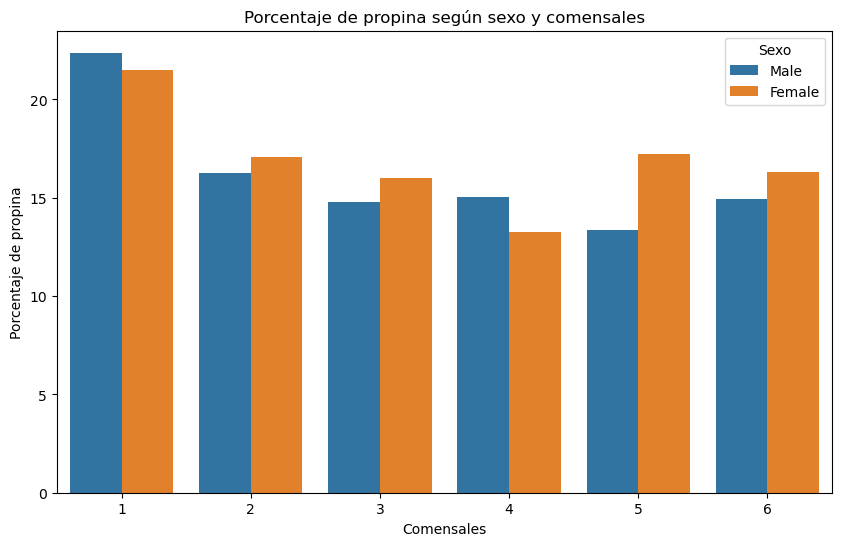

In [41]:
# Agrupar los datos para contar las propinas según sexo y tamaño de mesa
conteo = df_copy.groupby(['sex', 'size'])['tip_percentage'].mean().reset_index()

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=conteo, x='size', y='tip_percentage', hue='sex')

# Añadir títulos y etiquetas
plt.title('Porcentaje de propina según sexo y comensales')
plt.xlabel('Comensales')
plt.ylabel('Porcentaje de propina')
plt.legend(title='Sexo')

# Mostrar el gráfico
plt.show()


/tmp/ipykernel_54461/1174288100.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  promedio = df_copy.groupby('day')['tip_percentage'].mean()


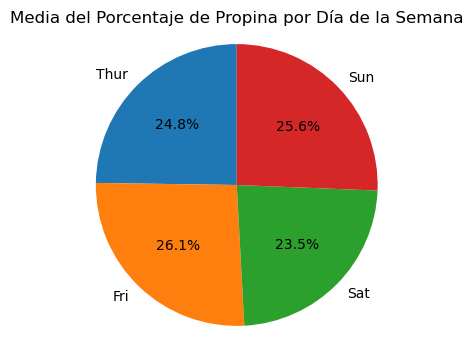

In [45]:
# Sacamos el promedio de tip% según el día de la semana
promedio = df_copy.groupby('day')['tip_percentage'].mean()

# Crear un pie chart
plt.figure(figsize=(4, 4))  # Ajustar el tamaño de la figura
plt.pie(promedio, labels=promedio.index, autopct='%1.1f%%', startangle=90)

# Añadir título
plt.title('Media del Porcentaje de Propina por Día de la Semana')

# Mostrar el gráfico
plt.axis('equal')  # Asegura que el pie chart sea un círculo
plt.show()

Podemos sacar muchas conclusiones de los datos pero mejor nos centramos en limpiarlos y que el modelo haga las relaciones para aproximar la propina

### DIVIDIR LOS DATOS

In [47]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df_tips, test_size=0.15, stratify=df_tips["size"], random_state=3)

In [48]:
my_train_set = train_set.copy()

### PREPARAR LOS DATOS

Tenemos que hacer una pipeline que haga:
* Categoricas binarias a booleanas (sex, smoker, time)
* Categorizar y encodear size
* Encodear day
* Estandarizar total_bill y tip

## ENTRENAMIENTO Y EVALUACIÓN DEL MODELO

No hacer de momento

## OPTIMIZACIÓN DEL MODELO

No hacer de momento

### EVALUACIÓN EN EL CONJUNTO DE PRUEBA

No hacer de momento

## PRESENTACIÓN DE LA SOLUCIÓN

Ahora tienes que crear un archivo .py con todo lo necesario para que ejecute el modelo que acabamos de crear, en concreto el script tiene que ejecutar lo siguiente:
- Pedir un csv para predecir los datos (suponemos que los datos en el csv están bien)
- Cargamos los datos del csv en un dataframe.
- Aplicamos nuestro modelo al dataframe.
- Informamos al usuario de las predicciones.